In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread('img.jpg', cv2.IMREAD_GRAYSCALE)

# div le niv de gray / 2
# svgrd img sauvegardée sur disque our comparer
img[:] = img[:]/2

# img_avant = cv2.imread('img_2.png', cv2.IMREAD_GRAYSCALE)

# cv2.imwrite('img_5.png', img_avant)


if img is None:
    print("erreur de chargement")
    exit(0)

In [3]:
min, max = 255 , 0
h, w = img.shape 
for y in range(h):
    for x in range(w):
        if img[y,x]<min:
            min=img[y,x]
        if img[y,x]>max:
            max=img[y,x]
print("min: ", min, "max: ", max)
# or
# max, min = np.max(img_avant), np.min(img_avant)

min:  2 max:  248


In [4]:
imgNorm = np.zeros((img.shape), (img.dtype))
for y in range(h):
    for x in range(w):
        imgNorm[y,x] = (img[y,x]-min)*255/(max-min)
# print("min: ", min, "max: ", max)

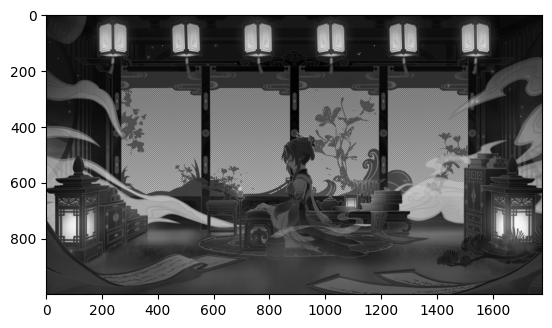

In [5]:
# OpenCV imread functions reads the image in a B, G, R fashion.
# Therefore if you read the image with imread and want to display with pyplot, first you need to convert the image into the R, G, B then display.i
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

# doesn't show the modifications as wanted
# plt.imshow(img_avant, cmap=plt.cm.gray)
# plt.show()

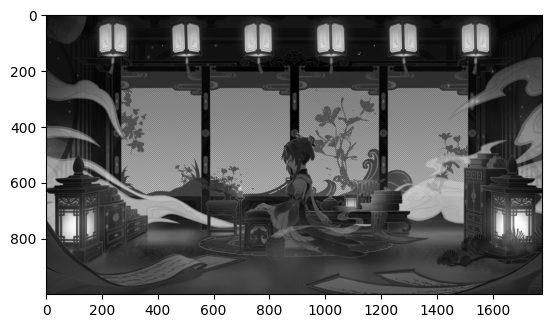

In [6]:
img_rgb = cv2.cvtColor(imgNorm, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [7]:
hist1 = np.zeros((256,1),np.uint16)

for y in range(h):
    for x in range(w):
        hist1[img[y,x], 0] += 1

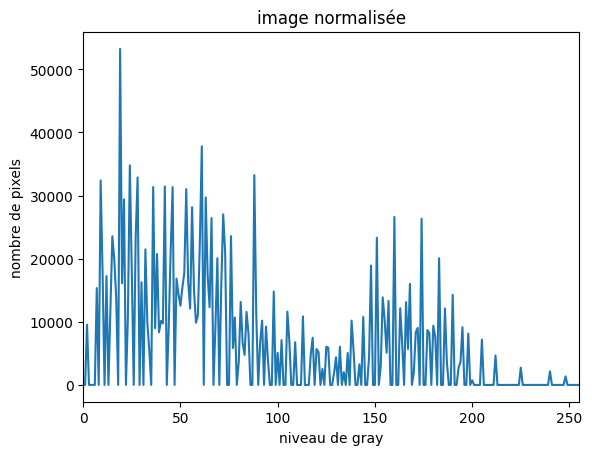

In [8]:
plt.figure()
plt.title('image normalisée')
plt.xlabel('niveau de gray')
plt.ylabel('nombre de pixels')
plt.plot(hist1)
plt.xlim([0, 255])
plt.show()

In [9]:
hist2 = cv2.calcHist([imgNorm],[0],None,[256],[0,255])

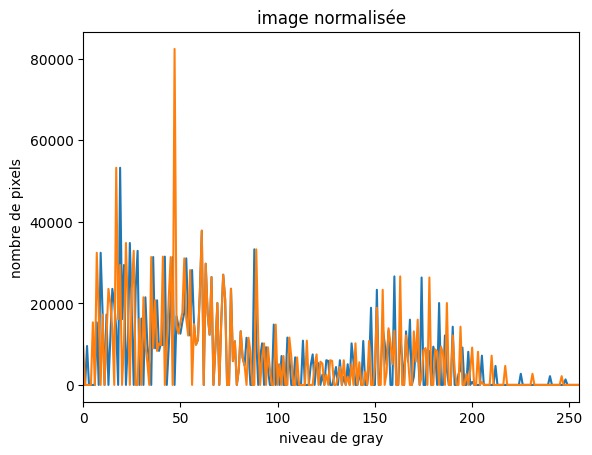

In [10]:
plt.figure()
plt.title('image normalisée')
plt.xlabel('niveau de gray')
plt.ylabel('nombre de pixels')
plt.plot(hist1)
plt.plot(hist2)
plt.xlim([0, 255])
plt.show()